<a href="https://colab.research.google.com/github/harrysharma/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
filepath='/content/drive/MyDrive/AlmaBetter/Python for Data Science/Capston Project/Copy of Telecom Churn.csv'
tele_df=pd.read_csv(filepath)

In [82]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Find area wise churn distribution , plot bar graph corresponding to it.


In [212]:
df1=tele_df[tele_df['Churn']==True].groupby(['State','Churn'],as_index=False).Churn.count()

In [219]:
df1.sort_values(by='Churn')

,Churn,total_count
State,,
AK,4.285714,70
HI,4.615385,65
AZ,5.128205,78
LA,5.194805,77
VA,6.410256,78
IA,6.818182,44
FL,7.547170,106
DC,7.936508,63
RI,8.823529,68


In [214]:
df1['total_count']=tele_df.groupby('State').State.transform('count')

In [215]:
df1['Churn']=df1['Churn']/df1['total_count']*100

In [216]:
df1.set_index('State',inplace=True)

In [230]:
churn_sum=df1['Churn'].nlargest(10).sum()
total_churn=df1['Churn'].sum()
print(df1.info())
print(churn_sum/total_churn*100)

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AK to WY
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Churn        51 non-null     float64
 1   total_count  51 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 3.7+ KB
None
33.47698645734849


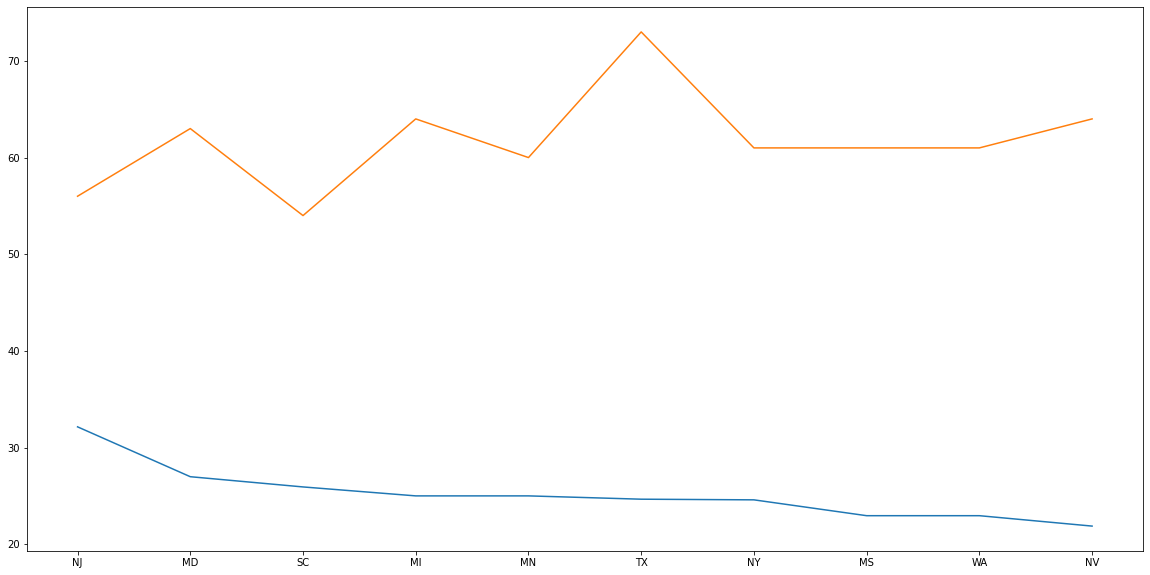

In [223]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(df1[['Churn','total_count']].nlargest(10,'Churn'))

State  - TX,NJ-18 has heighest churn value   following that MD-17,MI-16,NY-15

Text(0, 0.5, 'Churn Customer Count (%)')

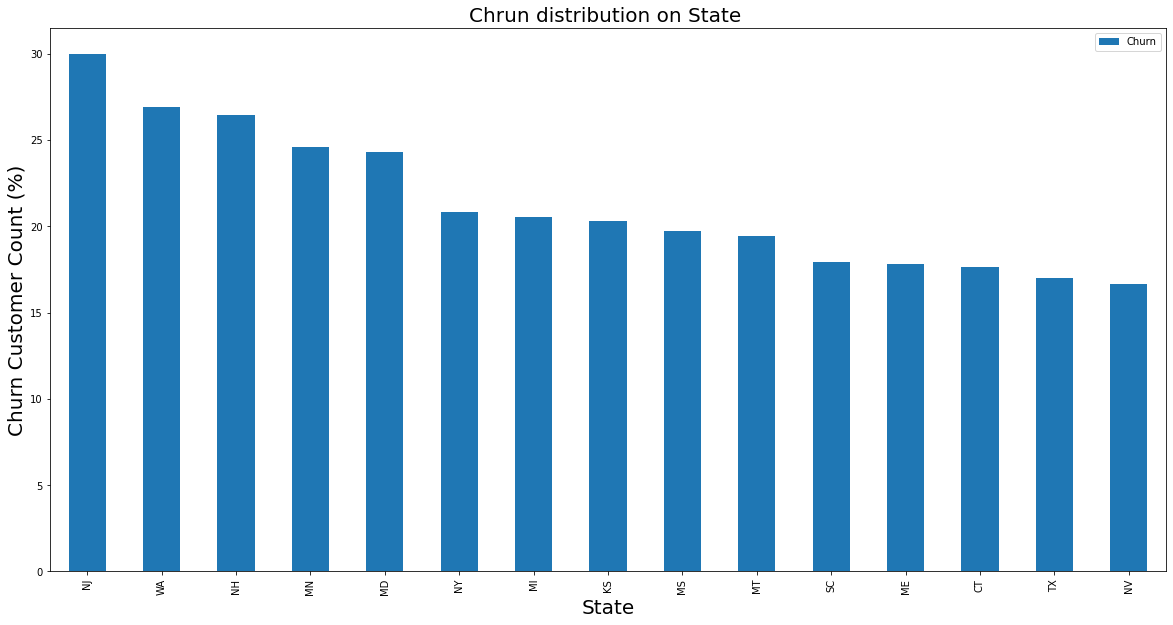

In [143]:
plt.rcParams['figure.figsize'] = (20, 10)
# plt.plot(df1.nlargest(15,'Churn'))

df1[['Churn']].nlargest(15,'Churn').plot(kind='bar')
plt.title('Chrun distribution on State ', fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Churn Customer Count (%)',fontsize=20)

In [144]:
tele_df['churn_count']=tele_df[tele_df['Churn']==True].groupby('State').Churn.transform('count')

In [145]:
df3=tele_df[['State','churn_count']].drop_duplicates()

In [146]:
df3.sort_values(by='churn_count',ascending=False)

,State,churn_count
89,NJ,18.0
69,TX,18.0
41,MD,17.0
502,MI,16.0
15,NY,15.0
...,...,...
136,NY,NaN
196,TN,NaN
212,PA,NaN
290,CT,NaN


In [150]:
df1=tele_df[tele_df['Churn']==True].groupby(['State','Area code'])['Churn'].count()

Text(0, 0.5, 'Churn Customer Count')

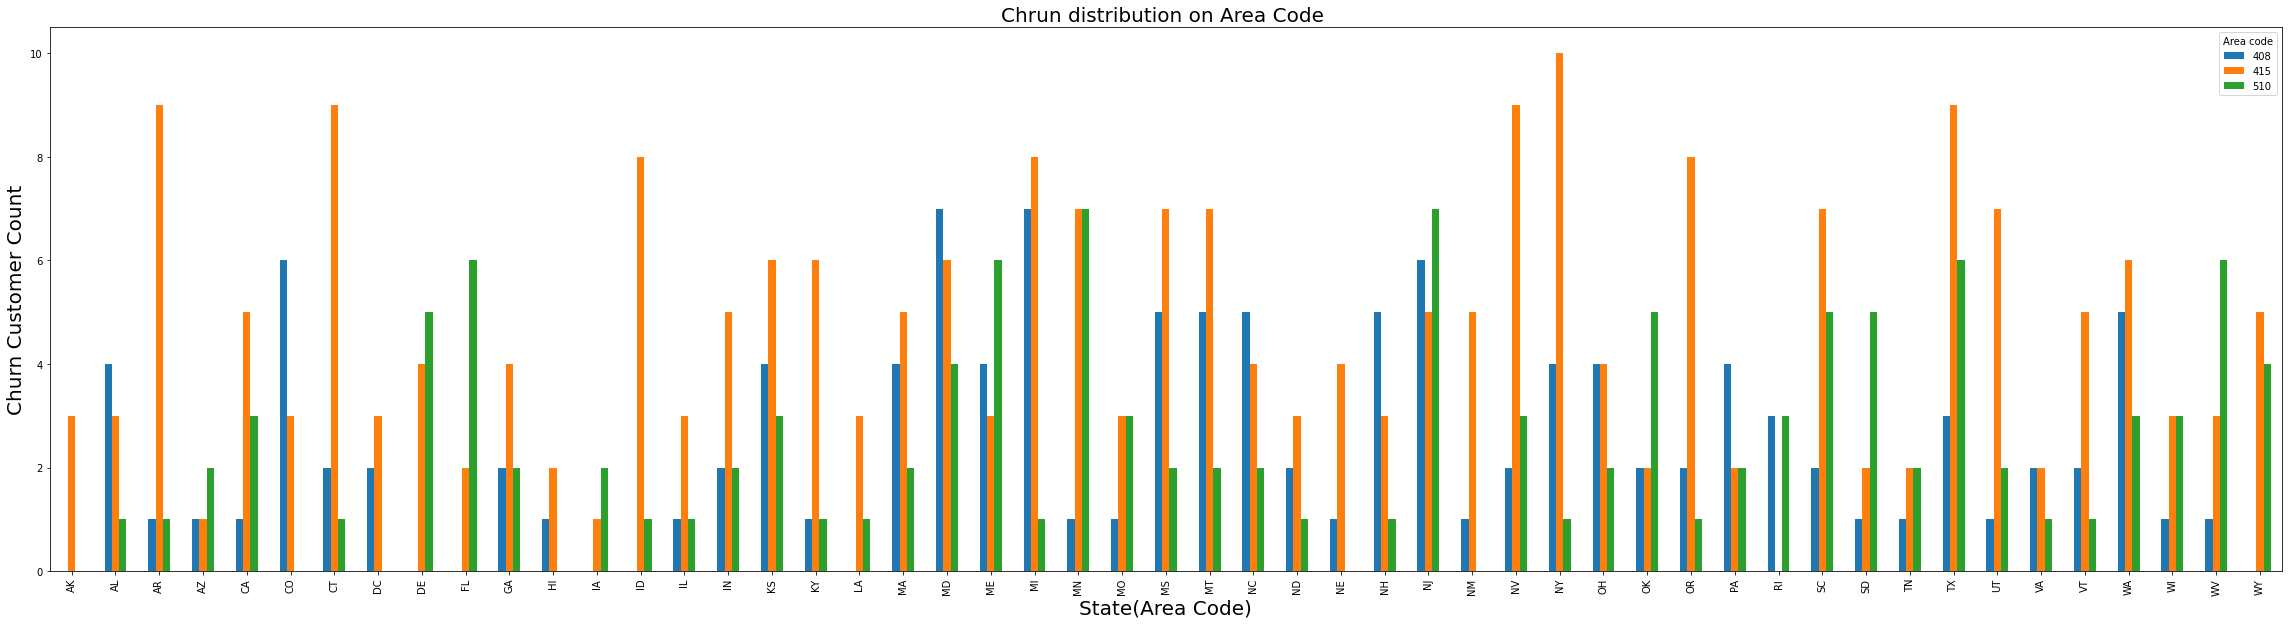

In [116]:
plt.rcParams['figure.figsize'] = (40, 10)
df1.plot(kind='bar')
plt.title('Chrun distribution on Area Code ', fontsize=20)
plt.xlabel('State(Area Code)',fontsize=20)
plt.ylabel('Churn Customer Count',fontsize=20)

# Charge per minute of Churn and non  Churn Customer

In [166]:
tele_df['charge_per_min_day'] =tele_df['Total day charge']/tele_df['Total day minutes']
tele_df['charge_per_min_eve'] =tele_df['Total eve charge']/tele_df['Total eve minutes']
tele_df['charge_per_min_night'] =tele_df['Total night charge']/tele_df['Total night minutes']

In [168]:
For non churn customer
chrg_p_min_day_mean = tele_df[tele_df['Churn']==False]['charge_per_min_day'].mean()
chrg_p_min_eve_mean = tele_df[tele_df['Churn']==False]['charge_per_min_eve'].mean()
chrg_p_min_night_mean = tele_df[tele_df['Churn']==False]['charge_per_min_night'].mean()
print(chrg_p_min_day_mean,chrg_p_min_eve_mean,chrg_p_min_night_mean)

0.17000331531507384 0.08500123332733626 0.0450003662063208


In [169]:
#For Churn customer
chrg_p_min_day_mean = tele_df[tele_df['Churn']==True]['charge_per_min_day'].mean()
chrg_p_min_eve_mean = tele_df[tele_df['Churn']==True]['charge_per_min_eve'].mean()
chrg_p_min_night_mean = tele_df[tele_df['Churn']==True]['charge_per_min_night'].mean()
print(chrg_p_min_day_mean,chrg_p_min_eve_mean,chrg_p_min_night_mean)

0.17000275572453427 0.08500081707432333 0.0450002247152355


In [198]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# **There is no difference between charge per minute for churn and non churn customer**

In [199]:
df1 = tele_df[['Churn','State','Account length','Total day calls']]
# df2=pd.MultiIndex.from_frame(pd.DataFrame([df1['State'].unique().tolist(), df1['Churn'].unique().tolist()],
#            )

In [196]:
df1.groupby(['Churn','State','Account length'])['Total day calls'].count()

KeyError: ignored

In [176]:
df2

10       65
15      161
21       77
33       12
41      135
       ... 
3301     84
3304     71
3320    122
3322     62
3323    117
Name: Account length, Length: 483, dtype: int64

In [195]:
pd.crosstab(tele_df['Churn'], tele_df['Account length'], margins = True)


Account length,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,191,192,193,194,195,196,197,199,200,201,202,204,205,208,209,210,212,215,217,221,224,225,232,243,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,7,0,5,1,1,2,2,1,3,3,4,2,8,3,7,2,2,4,3,7,6,2,5,4,1,8,5,4,8,7,7,9,6,8,13,11,8,6,6,13,...,1,6,7,2,5,4,4,4,5,3,6,2,0,6,7,1,3,3,3,2,2,2,1,1,2,1,2,2,0,2,2,1,1,2,1,1,1,1,1,2850
True,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,2,0,1,0,1,0,2,3,1,0,1,1,1,0,0,0,1,1,1,1,2,1,1,3,1,...,0,0,2,1,1,1,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,483
All,8,1,5,1,1,2,2,1,3,3,4,3,9,3,8,4,2,5,3,8,6,4,8,5,1,9,6,5,8,7,7,10,7,9,14,13,9,7,9,14,...,1,6,9,3,6,5,5,6,5,4,6,2,1,6,7,1,3,4,3,2,2,3,1,1,3,1,2,2,1,3,2,2,1,2,1,2,2,1,1,3333


In [197]:
sns.countplot(x = 'Account length', hue = 'Churn', data = tele_df)


NameError: ignored